In [15]:
import os
SIGNLANG_PATH = "~/ml/datasets/signLang"

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# load data function
def load_signLand_data(signLang_path=SIGNLANG_PATH, file="sign_mnist_train.csv"):
    csv_path = os.path.join(signLang_path, file)
    return pd.read_csv(csv_path)

## Load train data
signs_train = load_signLand_data()
#signs.head()
signs_train.info()
print("Training data array shape:signs_t ",signs_train.shape)
print("Training data length: ",len(signs_train.index))

file_test = "sign_mnist_test.csv"
signs_test = load_signLand_data(SIGNLANG_PATH,file_test)
signs_test.info()
print("Testing data array shape:signs_t ",signs_test.shape)
print("Testing data length: ",len(signs_test.index))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
Training data array shape:signs_t  (27455, 785)
Training data length:  27455
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
Testing data array shape:signs_t  (7172, 785)
Testing data length:  7172


In [16]:
## Process data
#extract labels column into y
y_train = signs_train.loc[:,'label']
y_test = signs_test.loc[:,'label']

#extract pixel array into X
X_train= signs_train
X_train.drop('label',axis=1,inplace=True)
X_test= signs_test
X_test.drop('label',axis=1,inplace=True)

## Display images
#format into 28x28 pixel image
index = 200
someSign = X_train.iloc[index].reshape(28,28)

#show original image
#plt.imshow(someSign)

#show binary image
#print("printing ", y_train[index])
#plt.imshow(someSign, cmap = matplotlib.cm.gray, interpolation="nearest")
#plt.show()





/home/rem/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [17]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#shuffle training set
shuffle_index = np.random.permutation(len(signs_train.index))
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]
someSign = X_train[0]


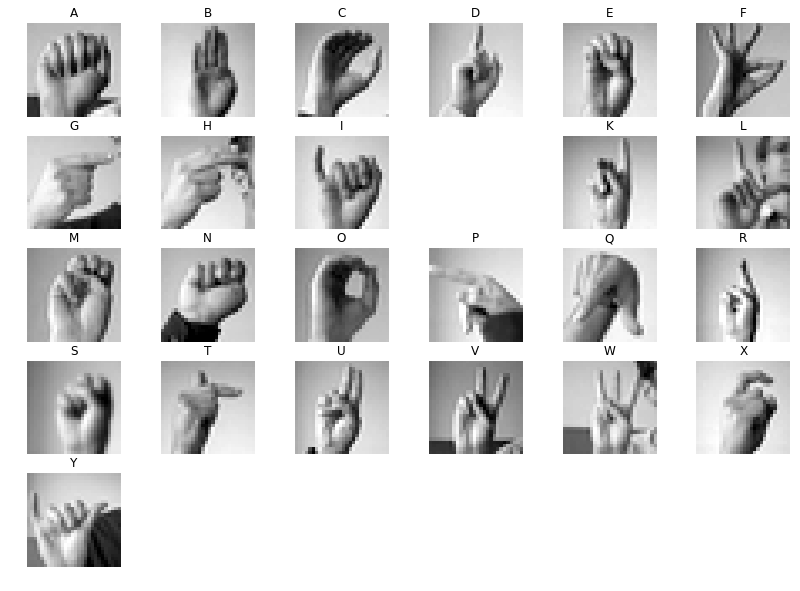

In [18]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    #print(index, signIndex)
    if index == 0:
        SIGN_A = signIndex
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()